In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sacra = pd.read_csv(r"C:\Users\Steve\Desktop\tf exercises/Sacramentorealestatetransactions.csv")

In [4]:
sacra.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
sacra.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [6]:
# This works to remove the columns with strings in our dataset.
columns = ['street', 'city','state', 'type']
sacra.drop(columns, inplace=True, axis=1)
sacra

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
0,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,95815,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,95815,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,95824,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,95841,3,1,1122,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,95842,3,2,1104,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,95820,3,1,1177,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,95670,2,2,941,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,95673,3,2,1146,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [7]:
sacra.head()

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
0,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,95815,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,95815,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,95824,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [8]:
sacra.head()

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
0,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,95815,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,95815,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,95824,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [9]:
sacra.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

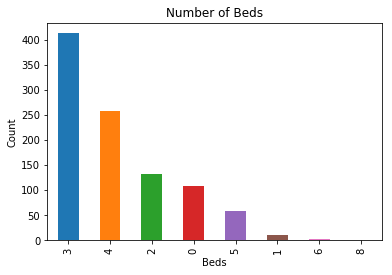

In [10]:
sacra['beds'].value_counts().plot(kind='bar')
plt.title('Number of Beds')
plt.xlabel('Beds')
plt.ylabel('Count')
sns.despine

# Visualizing the location of the houses.

C:\Users\Steve\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Steve\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

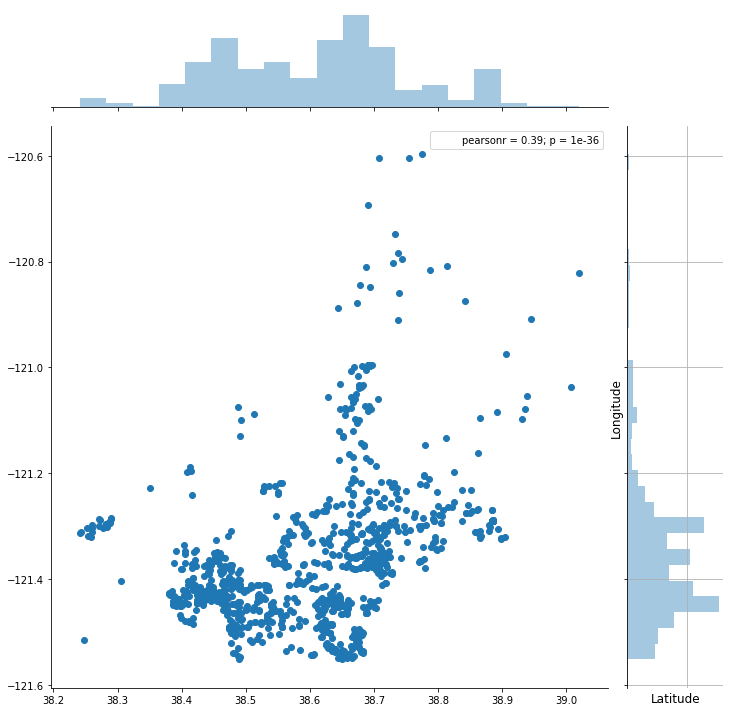

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
# According to the dataset, we have latitude and longitude on the dataset
# for each house. we are going to see the common location.
# its pretty awesome
plt.figure(figsize=(10,10))
sns.jointplot(x=sacra.latitude.values, y=sacra.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid()
plt.show()
sns.despine

In [12]:
## factors affecting the house prices

In [20]:
a = sacra.loc[sacra['sq__ft']==0]
a.index
b = a.index
b
z = sacra.drop(b)

In [21]:
t = sacra.loc[sacra['sq__ft']>5000]
t
z = z.drop(866)
z

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
0,95838,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,95823,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,95815,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,95815,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,95824,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,95841,3,1,1122,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,95842,3,2,1104,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,95820,3,1,1177,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,95670,2,2,941,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,95673,3,2,1146,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


Text(0,0.5,'Price')

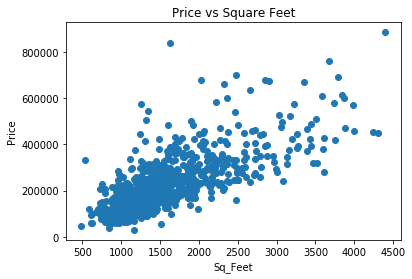

In [22]:
plt.scatter(z.sq__ft,z.price)
plt.title("Price vs Square Feet")
plt.xlabel("Sq_Feet")
plt.ylabel("Price")

Text(0.5,1,'Price vs Longitude')

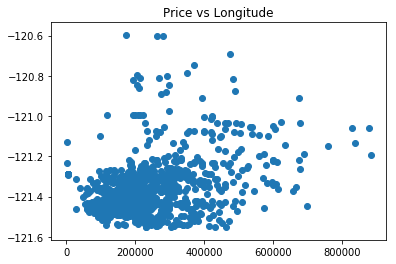

In [13]:
plt.scatter(sacra.price,sacra.longitude)
plt.title("Price vs Longitude")

# Linear Regression

In [23]:
# Is a model in statistics which enables us predict the future based upon
# past relationship of variables.
# y = mx + c


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()

In [26]:
labels = z['price']
conv_dates = [1 if values == 2008 else 0 for values in z.sale_date]
z['sale_date'] = conv_dates
train1 = z.drop(['price'], axis=1)

In [27]:
from sklearn.cross_validation import train_test_split

C:\Users\Steve\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:

x_train, x_test, y_train , y_test = train_test_split(train1, labels,test_size = 0.01, random_state = 2)


In [36]:

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
reg.score(x_test,y_test)

0.84397393397523612

In [38]:
# So our accuracy is just 20%... that is low
# In order to improve our prediction, we can use Gradient Boosting Regression.
# It is a machine learning technique for regression and classification problems,
#which produces a prediction model in the form of and ensemble of weak prediction models, typically decision trees.

In [39]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 10, min_samples_split = 2,
                                        learning_rate = 0.01, loss = 'ls')

In [40]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [41]:
clf.score(x_test,y_test)

0.9279994872923133

In [48]:
from sklearn.grid_search import RandomizedSearchCV

# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

ValueError: shapes (3,3) and (7,) not aligned: 3 (dim 1) != 7 (dim 0)